<a href="https://colab.research.google.com/github/theofil/CompPhysics/blob/master/examples/WignerLoops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Performing a sequence of non-collinear boosts
# Code by Konstantinos Theofilatos 01.04.2021
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=20) 

[[0]
 [1]
 [0]
 [0]]


Text(0, 0.5, 'z')

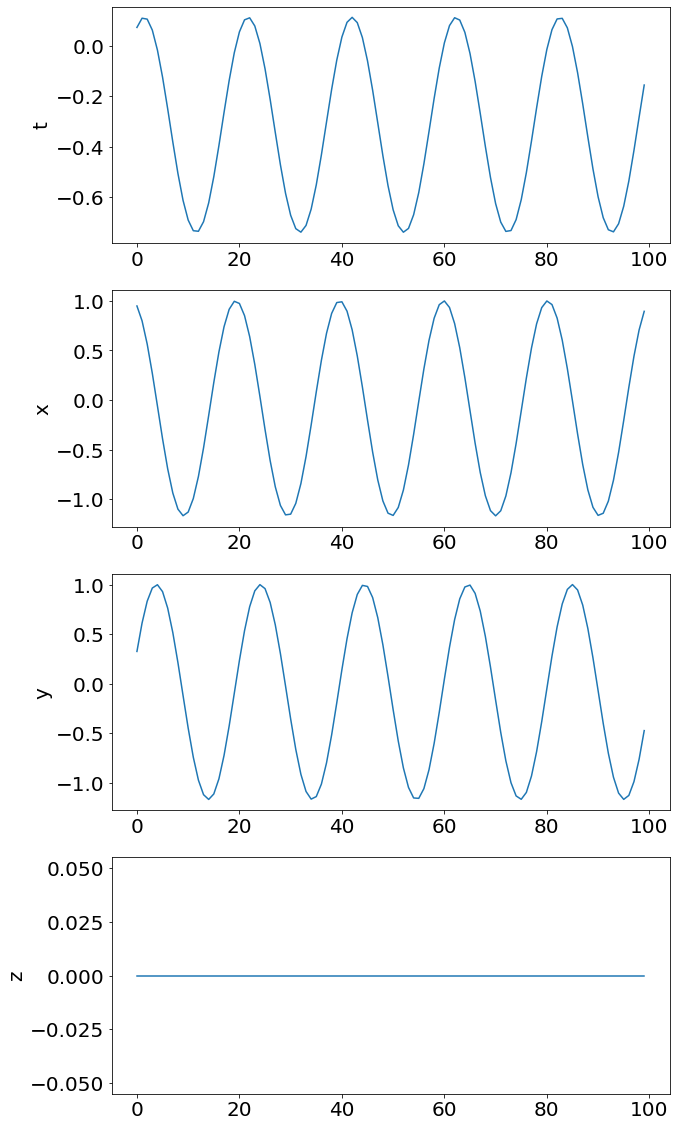

In [6]:
# Lorentz boost for a generic velocity
def Γ(vx, vy, vz):
    v  = (vx**2 + vy**2 + vz**2)**0.5
    γ  = (1 - v**2)**(-0.5)
   
    G = np.array([[     γ,                 -γ*vx,                -γ*vy,               -γ*vz],
                  [ -γ*vx,   1 + (γ-1)*(vx/v)**2,   (γ-1)*(vx*vy)/v**2,  (γ-1)*(vx*vz)/v**2],
                  [ -γ*vy,    (γ-1)*(vx*vy)/v**2,  1 + (γ-1)*(vy/v)**2,  (γ-1)*(vy*vz)/v**2],
                  [ -γ*vz,    (γ-1)*(vz*vx)/v**2,   (γ-1)*(vy*vz)/v**2, 1 + (γ-1)*(vz/v)**2]
                 ]
                )    
    return G

t, x, y, z = 0, 1, 0, 0           
xμ = np.array([[t],[x],[y],[z]])  # our four vector
print(xμ)

u = 0.5 # velocity of the boosts
W = Γ(0,-u,0)@Γ(-u,0,0)@Γ(0,u,0)@Γ(u,0,0) # a Wigner loop matrix product
                                          

ts = []
xs = []
ys = []
zs = []
for i in range(100): # perform 100 Wigner Loops!
    xμ = W@xμ
    ts += [xμ[0][0]]
    xs += [xμ[1][0]]
    ys += [xμ[2][0]]
    zs += [xμ[3][0]]
    #print(xμ)
    #print(' ')
    
fig, ax = plt.subplots(4,1, figsize = (10,20)) 
ax[0].plot(ts)
ax[0].set_ylabel('t')
ax[1].plot(xs)
ax[1].set_ylabel('x')
ax[2].plot(ys)
ax[2].set_ylabel('y')
ax[3].plot(zs)
ax[3].set_ylabel('z')

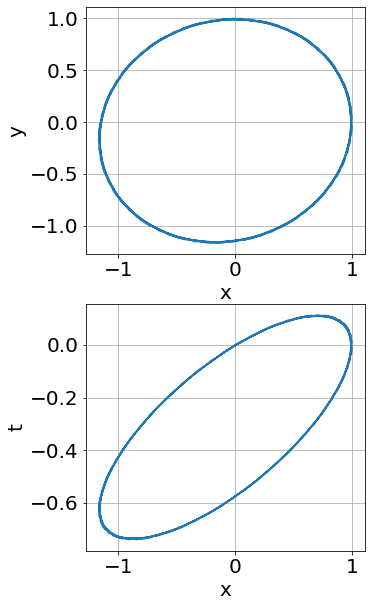

In [7]:
fig, ax = plt.subplots(2,1, figsize = (5,10))

ax[0].plot(xs, ys)
ax[0].set_ylabel('y')
ax[0].set_xlabel('x')
ax[0].grid(True)



ax[1].plot(xs, ts)
ax[1].set_ylabel('t')
ax[1].set_xlabel('x')
ax[1].grid(True)